# Import Libraries

In [36]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from operator import add
from pyspark import SparkContext
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Data Preprocessing

In [37]:
df = pd.read_csv("data\Combined_data.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

#### Split data based on the value of Lable.

In [ ]:
df_0=df[(df['Label'].isin([0]))]
df_1=df[(df['Label'].isin([1]))]

In [ ]:
df.to_csv("data/new_data.csv",index=False,header=0)
df_0.to_csv("data/new_data_0.csv",index=False,header=0)
df_1.to_csv("data/new_data_1.csv",index=False,header=0)

#### Define a list of word where words should be discarded. 

In [30]:
filtered_words = [word for word in stopwords.words('english')]
filtered_words.extend(['the','say','could','would','may','nd','one','two','three','four','five',''])
print(filtered_words)
punctuations = ['!',',','.','?','"','\'',':',';','\\']
concate = '-'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:

def Func_1(line):
    row = ""
    line = line.split(',')
    for idx,cell in enumerate(line):
        if(idx>=2):
            size = len(cell)
            cell = cell.lower()
            cell = cell[2:size-1]
            cell_array = cell.split(" ")
            for word in cell_array:
                if len(word)<2: continue
                if word not in filtered_words:
                    for punc in punctuations:
                        word = word.replace(punc,"")
                    if word.startswith('[') or word.startswith('(') or word.startswith('*') or word.startswith('&'): continue
                    word = lemmatizer.lemmatize(word,'v')
                    if len(word)<2 or word in filtered_words : continue
                    row = row + word +" "
           
    return row

def cmp(a, b):
    if b[1] < a[1]:
        return -1
    if a[1] < b[1]:
        return 1
    return 0


# Word Count
#### Firstly we do word-count on the whole dataset.

In [38]:
sc =SparkContext()
rdd = sc.textFile('data/new_data.csv')
#rdd.take(5)
lines = rdd.map(Func_1)
docs=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
#print(output)
sc.stop()

In [39]:
print(output[0:100])

[('us', 3432), ('kill', 2351), ('new', 2132), ('government', 1747), ('people', 1676), ('police', 1624), ('attack', 1515), ('find', 1483), ('state', 1471), ('world', 1425), ('war', 1390), ('use', 1350), ('israel', 1309), ('force', 1282), ('ban', 1277), ('years', 1273), ('call', 1258), ('right', 1189), ('report', 1180), ('first', 1167), ('take', 1160), ('president', 1143), ('make', 1112), ('protest', 1070), ('plan', 1043), ('israeli', 1030), ('military', 1016), ('minister', 1015), ('year', 983), ('time', 981), ('get', 967), ('korea', 967), ('court', 957), ('bank', 943), ('go', 940), ('uk', 916), ('nuclear', 915), ('china', 908), ('arrest', 896), ('man', 874), ('death', 865), ('drug', 832), ('russian', 815), ('un', 811), ('show', 799), ('million', 796), ('north', 796), ('want', 786), ('russia', 785), ('warn', 778), ('give', 769), ('country', 763), ('law', 761), ('group', 754), ('face', 748), ('gaza', 743), ('news', 737), ('oil', 737), ('fire', 725), ('human', 724), ('iran', 709), ('claim'

#### We consider to add more wight for words appearing in more popular headlines.

In [42]:
def Func_2(line):
    row = []
    line = line.split(',')
    for idx,cell in enumerate(line):
        if(idx>=2):
            size = len(cell)
            cell = cell.lower()
            if cell.startswith('top'): continue
            cell = cell[2:size-1]
            cell = cell.replace(concate," ")
            cell_array = cell.split(" ")
            for word in cell_array:
                if len(word)<2: continue
                if word not in filtered_words:
                    for punc in punctuations:
                        word = word.replace(punc,"")
                    if word.startswith('[') or word.startswith('(') or word.startswith('*') or word.startswith('&') : continue
                    word = lemmatizer.lemmatize(word,'n')
                    if len(word)<2 or word in filtered_words : continue
                    if idx<=5: coef = 5
                    elif 5<idx<=10: coef = 3
                    elif 10<idx<=15: coef = 2 
                    else: coef = 1
                    row.append((word,coef))
           
    return row


In [44]:
sc =SparkContext()
rdd = sc.textFile('data/new_data.csv')
#rdd.take(5)
lines = rdd.flatMap(Func_2)
counts = lines.map(lambda x: (x[0], x[1])) \
                .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
print(output[0:100])
sc.stop()

[('year', 6577), ('new', 4571), ('world', 4520), ('government', 4500), ('people', 3710), ('police', 3574), ('country', 3381), ('israel', 3197), ('state', 3186), ('war', 3014), ('woman', 2999), ('right', 2874), ('president', 2610), ('attack', 2602), ('first', 2522), ('israeli', 2482), ('killed', 2469), ('korea', 2444), ('china', 2423), ('child', 2401), ('law', 2345), ('million', 2326), ('protest', 2304), ('time', 2301), ('death', 2272), ('ban', 2198), ('drug', 2193), ('old', 2179), ('military', 2169), ('said', 2165), ('court', 2140), ('minister', 2134), ('uk', 2061), ('found', 2030), ('man', 2018), ('official', 2003), ('nuclear', 1997), ('un', 1951), ('force', 1950), ('palestinian', 1904), ('russian', 1893), ('bank', 1847), ('day', 1817), ('russia', 1809), ('north', 1800), ('news', 1782), ('call', 1758), ('human', 1752), ('report', 1723), ('oil', 1687), ('leader', 1676), ('iran', 1644), ('group', 1578), ('get', 1547), ('want', 1527), ('anti', 1519), ('kill', 1517), ('muslim', 1507), ('c

# TF-IDF
#### Pick the most relevant words.

In [62]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])


# count matrix
count_vector=cv.transform(docs)
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df=df.sort_values(by=["tfidf"],ascending=False)
df.head(10)

,tfidf
georgia,0.440182
ossetia,0.278817
south,0.226364
russian,0.170731
osseti,0.161411
invade,0.160188
russia,0.129892
war,0.122520
iran,0.118277
rice,0.116533


# Visualization
#### Create a word cloud for the news

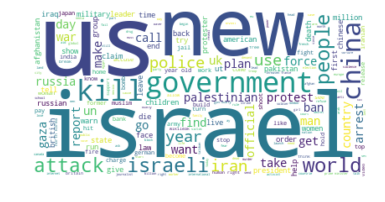

In [27]:
text = ""
for sentence in docs:
    text = text + sentence + ' '
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)


wordcloud = WordCloud(stopwords=filtered_words, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### Get the word cloud for the news when the stock close value decreased.

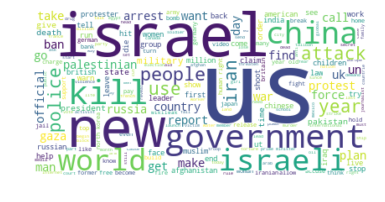

In [57]:
sc =SparkContext()
rdd = sc.textFile('data/new_data_0.csv')
lines = rdd.map(Func_1)
docs_0=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
#print(output)
sc.stop()
text_0 = ""
for sentence in docs_0:
    text_0 = text + sentence + ' '
wordcloud = WordCloud().generate(text_0)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_0)

wordcloud = WordCloud(stopwords=filtered_words, background_color="white").generate(text_0)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Get the word cloud for the news when the stock close value rose or stayed as the same.

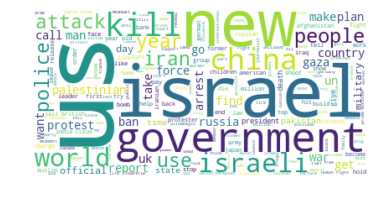

In [58]:
sc =SparkContext()
# no column name file
rdd = sc.textFile('data/new_data_1.csv')
#rdd.take(5)
lines = rdd.map(Func_1)
docs_1=lines.take(1989)
counts = lines.flatMap(lambda x: x.split(' '))
counts = counts.filter(lambda x: x not in filtered_words)
counts = counts.map(lambda x: (x, 1)) \
                  .reduceByKey(add)
output = counts.collect()
output.sort()
output = sorted(output,key=lambda x: x[1],reverse = True)
sc.stop()
text_1 = ""
for sentence in docs_1:
    text_1 = text + sentence + ' '
wordcloud = WordCloud().generate(text_1)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_1)


wordcloud = WordCloud(stopwords=filtered_words, background_color="white").generate(text_1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()